# **Reducción de dimensionalidad**

* Curse of dimensionality
* Utilidad de reducción de dimensionalidad
  * DataViz. Escencial para comunicar resultados.
* Enfoques de la reducciión de dimensionalidad
  * Proyección
  * Manifold Learning

* PCA
  * Componentes principales
    * Singular Value Decomposition (SVD)
  * explained variance ratio
  * Compresión y decompresión con PCA
  * Randomized PCA
  * Incremental PCA
  * Kernel PCA
    * Tipos de kernel
    * Cómo escoger hiperparámetros
* Locally Linear Embedding (LLE)
* Otras técnicas
  * Multidimensional Scaling (MDS)
  * Isomap
  * t-Distributed Stochastic Neighbor Embedding (t-SNE)
  * Linear Discriminant

PCA

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(4)

m=60
w1,w2 = 0.1, 0.3
noise=0.1

angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5

X = np.empty((m, 3))

X[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m) /2
X[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) /2
X[:, 2] = X[:, 0] * w1 + X[:, 1] * w2 + noise * np.random.randn(m)

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X2D = pca.fit_transform(X)

In [ ]:
X2D[:5]

array([[ 1.26203346,  0.42067648],
       [-0.08001485, -0.35272239],
       [ 1.17545763,  0.36085729],
       [ 0.89305601, -0.30862856],
       [ 0.73016287, -0.25404049]])

In [ ]:
X3D_inv = pca.inverse_transform(X2D)

In [ ]:
np.allclose(X3D_inv, X) # <--- Comprobar si son iguales o  casi iguales con tolerancia

False

In [ ]:
np.mean(np.sum(np.square(X3D_inv - X), axis=1))

0.01017033779284855

In [ ]:
pca.components_

array([[-0.93636116, -0.29854881, -0.18465208],
       [ 0.34027485, -0.90119108, -0.2684542 ]])

In [ ]:
pca.explained_variance_ratio_

array([0.84248607, 0.14631839])

In [ ]:
pca.explained_variance_ratio_.sum()

0.988804464429311

Elegir el número correcto de dimensiones

In [ ]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml("mnist_784", as_frame=False, cache=False)
mnist.keys()

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [ ]:
type(mnist.target[0])

numpy.uint8

In [ ]:
from sklearn.model_selection import train_test_split
mnist.target = mnist.target.astype(np.uint8)

X = mnist.data
Y = mnist.target
X_train, X_test, y_train, y_test = train_test_split(X, Y)

In [ ]:
from sklearn.decomposition import PCA

pca = PCA()

pca.fit(X_train)

cumsum = np.cumsum(pca.explained_variance_ratio_)
print(cumsum)
d = np.argmax(cumsum >= 0.95) + 1

[0.09719832 0.16875148 0.23046024 0.28447767 0.33353621 0.37656401
 0.40934646 0.43819275 0.46567853 0.48924485 0.51032629 0.5307285
 0.54778858 0.56465048 0.58041792 0.59534958 0.60862878 0.62147783
 0.63334578 0.64479193 0.65545804 0.66555448 0.67514241 0.68416896
 0.69296211 0.70131513 0.70939893 0.71727437 0.72468736 0.73157212
 0.73812949 0.74459959 0.75058197 0.75643475 0.76210811 0.7675608
 0.77261474 0.77750626 0.78230885 0.78696883 0.79152081 0.79597374
 0.80014325 0.80411726 0.80795962 0.81171266 0.81533146 0.81882001
 0.8221978  0.82541301 0.82859763 0.83168676 0.83465474 0.83752128
 0.84034773 0.84303834 0.84571815 0.84828932 0.85083357 0.85329543
 0.85569464 0.8580644  0.86035289 0.86256245 0.86468703 0.86673787
 0.86875875 0.87071732 0.87263867 0.87451472 0.87637902 0.87817437
 0.87993644 0.88167564 0.88332694 0.88496271 0.88657643 0.88811577
 0.88959381 0.89101268 0.89242922 0.89382729 0.89522047 0.8965766
 0.89790212 0.89922092 0.90051436 0.90177067 0.90299961 0.9042022

In [ ]:
d

154

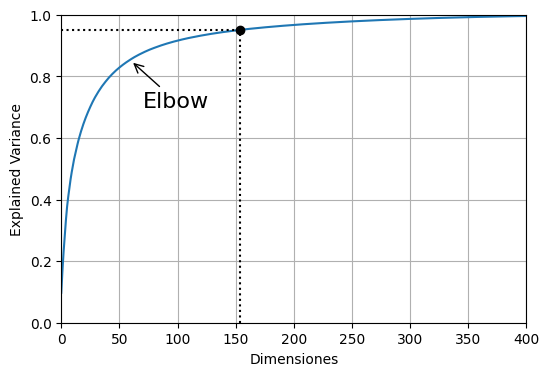

In [ ]:
plt.figure(figsize=(6,4))
plt.plot(cumsum)
plt.axis([0,400, 0, 1])
plt.xlabel("Dimensiones")
plt.ylabel("Explained Variance")
plt.plot([d, d], [0, 0.95], "k:")
plt.plot([0,d], [0.95, 0.95], "k:")
plt.plot(d, 0.95, "ko")
plt.annotate("Elbow", xy=(60, 0.85), xytext=(70,0.7),
             arrowprops=dict(arrowstyle="->"), fontsize=16)

plt.grid(True)

plt.show()

In [ ]:
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X_train)

In [ ]:
pca.n_components_

154

In [ ]:
np.sum(pca.explained_variance_ratio_)

0.9503684424557439

In [ ]:
from sklearn.datasets import load_iris

iris = load_iris()

X = iris.data
Y = iris.target

In [ ]:
print(type(X[0][0]))

<class 'numpy.float64'>


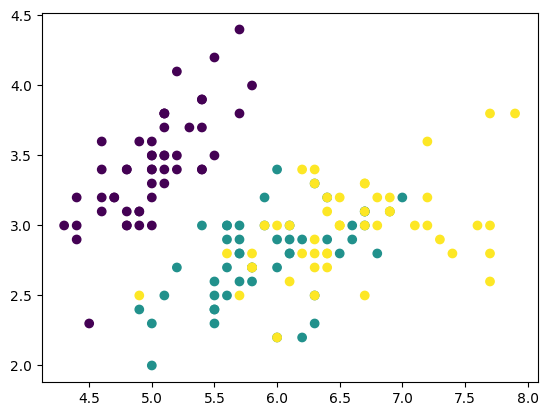

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(X[:,0], X[:, 1], c=iris.target)

In [ ]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X)

PCA()

In [ ]:
pca.explained_variance_ratio_

array([0.92461872, 0.05306648, 0.01710261, 0.00521218])

In [ ]:
cumsum = np.cumsum(pca.explained_variance_ratio_)
cumsum

array([0.92461872, 0.97768521, 0.99478782, 1.        ])

In [ ]:
pca1 = PCA(n_components=2)
X2D = pca1.fit_transform(X)

In [ ]:
print(X2D)

[[-2.68412563  0.31939725]
 [-2.71414169 -0.17700123]
 [-2.88899057 -0.14494943]
 [-2.74534286 -0.31829898]
 [-2.72871654  0.32675451]
 [-2.28085963  0.74133045]
 [-2.82053775 -0.08946138]
 [-2.62614497  0.16338496]
 [-2.88638273 -0.57831175]
 [-2.6727558  -0.11377425]
 [-2.50694709  0.6450689 ]
 [-2.61275523  0.01472994]
 [-2.78610927 -0.235112  ]
 [-3.22380374 -0.51139459]
 [-2.64475039  1.17876464]
 [-2.38603903  1.33806233]
 [-2.62352788  0.81067951]
 [-2.64829671  0.31184914]
 [-2.19982032  0.87283904]
 [-2.5879864   0.51356031]
 [-2.31025622  0.39134594]
 [-2.54370523  0.43299606]
 [-3.21593942  0.13346807]
 [-2.30273318  0.09870885]
 [-2.35575405 -0.03728186]
 [-2.50666891 -0.14601688]
 [-2.46882007  0.13095149]
 [-2.56231991  0.36771886]
 [-2.63953472  0.31203998]
 [-2.63198939 -0.19696122]
 [-2.58739848 -0.20431849]
 [-2.4099325   0.41092426]
 [-2.64886233  0.81336382]
 [-2.59873675  1.09314576]
 [-2.63692688 -0.12132235]
 [-2.86624165  0.06936447]
 [-2.62523805  0.59937002]
 

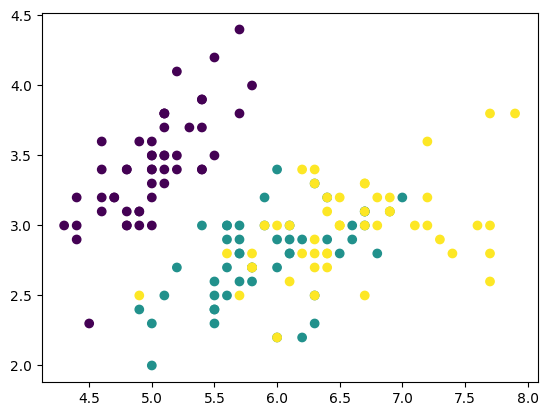

In [ ]:
plt.scatter(X[:,0], X[:, 1], c=iris.target,)

In [ ]:
pca2 = PCA(n_components = 3)
X3D = pca2.fit_transform(X)

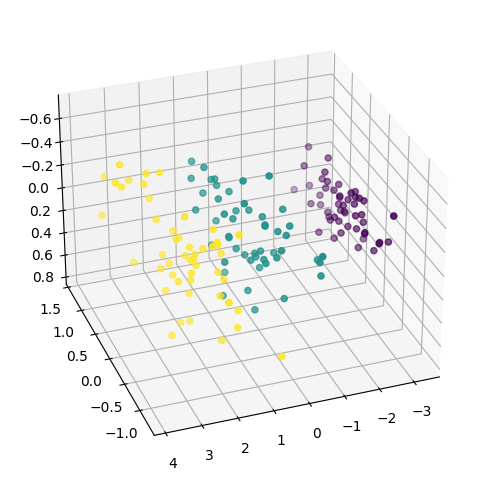

In [ ]:
fig = plt.figure(1, figsize=(8,6))
ax = fig.add_subplot(111, projection="3d", elev=-150, azim=110)
ax.scatter(X3D[:,0], X3D[:,1], X3D[:, 2], c=iris.target)

PCA para compresión

In [ ]:
X = mnist.data
Y = mnist.target
X_train, X_test, y_train, y_test = train_test_split(X, Y)

In [ ]:
pca = PCA(n_components=154)
X_reduced = pca.fit_transform(X_train)
X_recovered = pca.inverse_transform(X_reduced)

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt

def plot_digits(instances, images_per_row=5, **options):
  size=28
  images_per_row = min(len(instances), images_per_row)
  n_rows = (len(instances)-1)//images_per_row+1

  # Append empty images to fill the end of the grid, if needed:
  n_empty = n_rows * images_per_row - len(instances)
  padded_instances = np.concatenate([instances, np.zeros((n_empty, size * size))], axis=0)

  # Reshape the array so it's organized as a grid containing 28×28 images:
  image_grid = padded_instances.reshape((n_rows, images_per_row, size, size))

  # Combine axes 0 and 2 (vertical image grid axis, and vertical image axis),
  # and axes 1 and 3 (horizontal axes). We first need to move the axes that we
  # want to combine next to each other, using transpose(), and only then we
  # can reshape:
  big_image = image_grid.transpose(0, 2, 1, 3).reshape(n_rows * size,
                                                        images_per_row * size)
  # Now that we have a big image, we just need to show it:
  plt.imshow(big_image, cmap = mpl.cm.binary, **options)
  plt.axis("off")

Text(0.5, 1.0, 'Compressed')

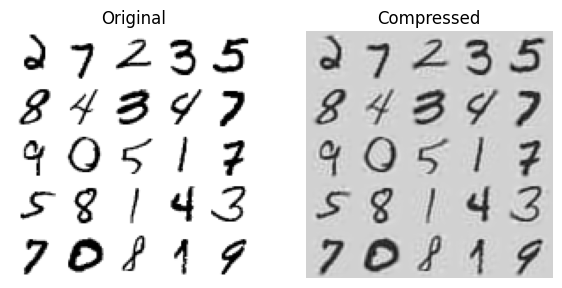

In [ ]:
plt.figure(figsize=(7,4))
plt.subplot(121)
plot_digits(X_train[::2100])
plt.title("Original")
plt.subplot(122)
plot_digits(X_recovered[::2100])
plt.title("Compressed")

Randomized PCA

In [ ]:
rnd_pca = PCA(n_components=154, svd_solver="randomized", random_state=42)
X_reduced = rnd_pca.fit_transform(X_train)

Incremental PCA

In [ ]:
from sklearn.decomposition import IncrementalPCA

n_batches = 100
inc_pca = IncrementalPCA(n_components=154)
for X_batch in np.array_split(X_train, n_batches):
  print(".", end="")
  inc_pca.partial_fit(X_batch)

X_reduced = inc_pca.transform(X_train)

....................................................................................................

In [ ]:
X_recovered = inc_pca.inverse_transform(X_reduced)

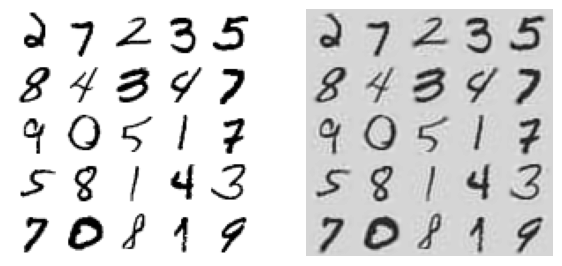

In [ ]:
plt.figure(figsize=(7,4))
plt.subplot(121)
plot_digits(X_train[::2100])
plt.subplot(122)
plot_digits(X_recovered[::2100])

In [ ]:
X_reduced_inc_pca = X_reduced

In [ ]:
np.allclose(pca.mean_, inc_pca.mean_)

True

Kernel PCA

In [ ]:
from sklearn.datasets import make_swiss_roll
X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)

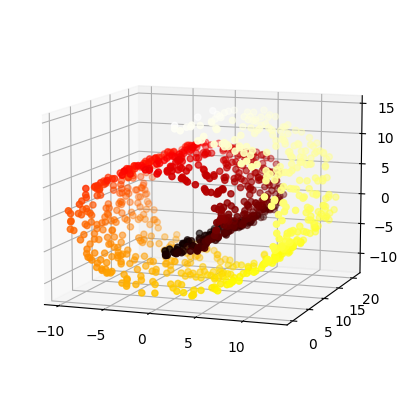

In [ ]:
fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(111, projection="3d")

ax.scatter(X[:,0], X[:, 1], X[:, 2], c=t, cmap=plt.cm.hot)
ax.view_init(10, -70)
plt.show()

In [ ]:
from sklearn.decomposition import KernelPCA

rbf_pca = KernelPCA(n_components=2, kernel="rbf", gamma=0.004)
X_reduced = rbf_pca.fit_transform(X)

In [ ]:
from sklearn.decomposition import KernelPCA

lin_pca = KernelPCA(n_components=2, kernel="linear", fit_inverse_transform=True)
rbf_pca = KernelPCA(n_components=2, kernel="rbf", gamma=0.0433, fit_inverse_transform=True)
sig_pca = KernelPCA(n_components=2, kernel="sigmoid", gamma=0.001, coef0=1, fit_inverse_transform=True)

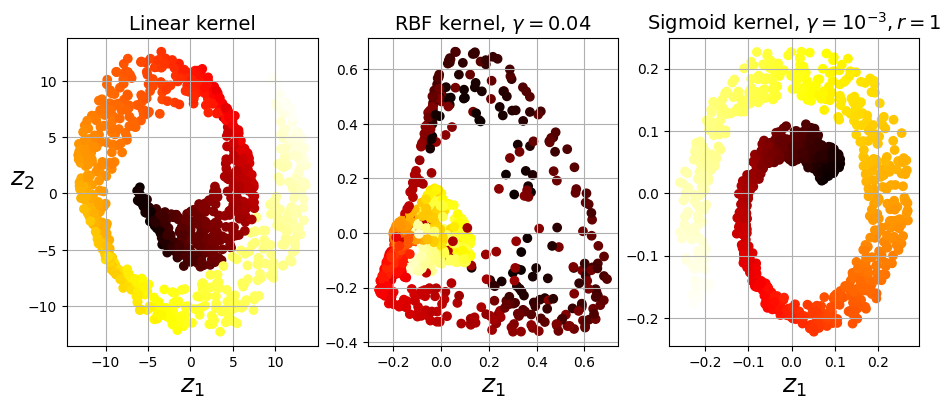

In [ ]:
y = t > 6.9

plt.figure(figsize=(11,4))
for subplot, pca, title in ((131, lin_pca, "Linear kernel"), (132, rbf_pca, "RBF kernel, $\gamma=0.04$"), (133, sig_pca, "Sigmoid kernel, $\gamma=10^{-3}, r=1$")):
    X_reduced = pca.fit_transform(X)
    if subplot == 131:
      X_reduced_lin = X_reduced
    if subplot == 132:
        X_reduced_rbf = X_reduced

    plt.subplot(subplot)
    #plt.plot(X_reduced[y, 0], X_reduced[y, 1], "gs")
    #plt.plot(X_reduced[~y, 0], X_reduced[~y, 1], "y^")
    plt.title(title, fontsize=14)
    plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=plt.cm.hot)
    plt.xlabel("$z_1$", fontsize=18)
    if subplot == 131:
        plt.ylabel("$z_2$", fontsize=18, rotation=0)
    plt.grid(True)

plt.show()

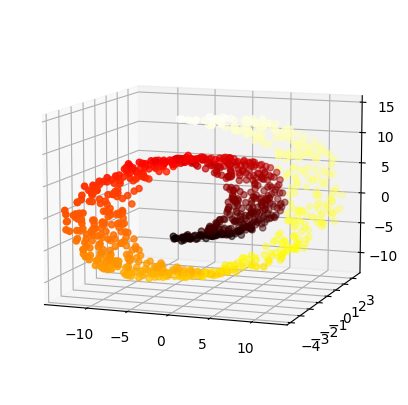

In [ ]:
plt.figure(figsize=(6,5))
X_inverse = lin_pca.inverse_transform(X_reduced_lin)

ax = plt.subplot(111, projection='3d')

ax.scatter(X_inverse[:, 0], X_inverse[:, 1], X_inverse[:, 2], c=t, cmap = plt.cm.hot)
ax.view_init(10,-70)
plt.show()

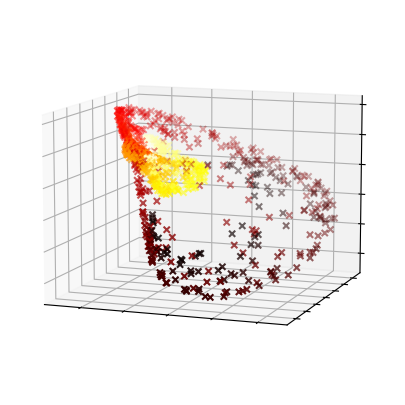

In [ ]:
plt.figure(figsize=(6, 5))

X_inverse = rbf_pca.inverse_transform(X_reduced_rbf)

ax = plt.subplot(111, projection='3d')
ax.view_init(10, -70)
ax.scatter(X_inverse[:, 0], X_inverse[:, 1], X_inverse[:, 2], c=t, cmap=plt.cm.hot, marker="x")
ax.set_xlabel("")
ax.set_ylabel("")
ax.set_zlabel("")
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_zticklabels([])

plt.show()

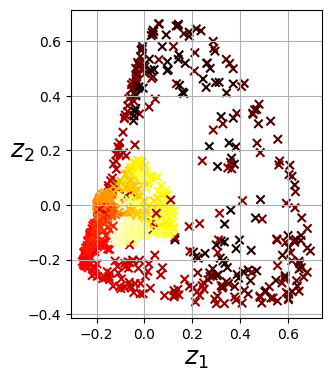

In [ ]:
X_reduced = rbf_pca.fit_transform(X)

plt.figure(figsize=(11, 4))
plt.subplot(132)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=plt.cm.hot, marker="x")
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", fontsize=18, rotation=0)
plt.grid(True)

## Seleccion de hiperparámetros para KernelPCA

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

clf = Pipeline([
    ("kpca", KernelPCA(n_components=2)),
    ("log_reg", LogisticRegression(solver="lbfgs"))
])

param_grid = [{
    "kpca__gamma": np.linspace(0.03, 0.05, 10),
    "kpca__kernel": ["rbf", "sigmoid"]
}]

grid_search = GridSearchCV(clf, param_grid, cv=3)
grid_search.fit(X, y)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('kpca', KernelPCA(n_components=2)),
                                       ('log_reg', LogisticRegression())]),
             param_grid=[{'kpca__gamma': array([0.03      , 0.03222222, 0.03444444, 0.03666667, 0.03888889,
       0.04111111, 0.04333333, 0.04555556, 0.04777778, 0.05      ]),
                          'kpca__kernel': ['rbf', 'sigmoid']}])

In [ ]:
print(grid_search.best_params_)

{'kpca__gamma': 0.043333333333333335, 'kpca__kernel': 'rbf'}


In [ ]:
rbf_pca = KernelPCA(n_components= 2, kernel="rbf", gamma=0.0433,
                    fit_inverse_transform=True)
X_reduced = rbf_pca.fit_transform(X)
X_preimage = rbf_pca.inverse_transform(X_reduced)

In [ ]:
from sklearn.metrics import mean_squared_error

mean_squared_error(X, X_preimage)

32.78630879576618

In [ ]:
X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=41)

In [ ]:
from sklearn.manifold import LocallyLinearEmbedding

lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10, random_state=42)
X_reduced = lle.fit_transform(X)

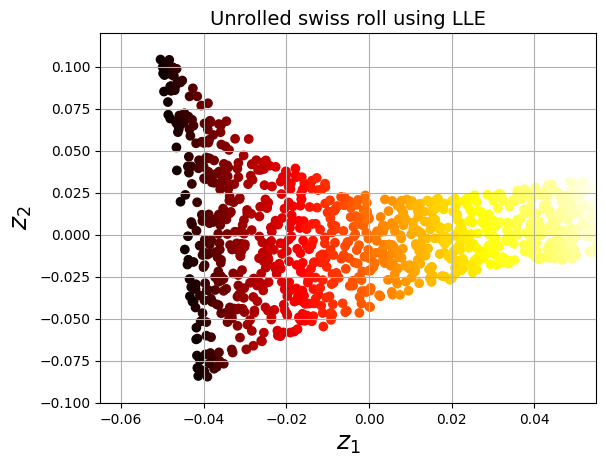

In [ ]:
plt.title("Unrolled swiss roll using LLE", fontsize=14)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=plt.cm.hot)
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", fontsize=18)
plt.axis([-0.065, 0.055, -0.1, 0.12])
plt.grid(True)

plt.show()

**Trabajar con MNIST. Medir tiempo con Random Forest y luego con Random Forest después de PCA. Comprobar accuracy.**

In [ ]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml("mnist_784", as_frame=False, cache=False)
mnist.keys()

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [ ]:
X_train = mnist.data[:60000]
y_train = mnist.target[:60000]

X_test = mnist.data[60000:]
y_test = mnist.target[60000:]

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42)

In [ ]:
import time

t1 = time.time()
rnd_clf.fit(X_train, y_train)
t0 = time.time()

In [ ]:
print("Random Forest - Tiempo: {:.2f}s".format(t0-t1))

Random Forest - Tiempo: 73.56s


In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)
X_train_reduced = pca.fit_transform(X_train)

In [ ]:
rnd_clf2 = RandomForestClassifier(random_state=42)

In [ ]:
t0 = time.time()
rnd_clf2.fit(X_train_reduced, y_train)
t1 = time.time()

In [ ]:
print("Random Forest con PCA - Tiempo: {:.2f}s".format(t1-t0))

Random Forest con PCA - Tiempo: 209.81s


In [ ]:
from sklearn.metrics import accuracy_score

y_pred1 = rnd_clf.predict(X_test)
print("Random Forest Accuracy: ", accuracy_score(y_test, y_pred1))

X_test_reduced = pca.transform(X_test)
y_pred2 = rnd_clf2.predict(X_test_reduced)
print("Random Forest PCA Accuracy: ", accuracy_score(y_test, y_pred2))

Random Forest Accuracy:  0.9705
Random Forest PCA Accuracy:  0.9481


In [ ]:
from sklearn.linear_model import LogisticRegression

log1 = LogisticRegression(multi_class="multinomial", solver="lbfgs", random_state=42)
log2 = LogisticRegression(multi_class="multinomial", solver="lbfgs", random_state=42)

In [ ]:
t0 = time.time()
log1.fit(X_train, y_train)
t1 = time.time()

print("Logistic Regression - Tiempo: {:.2f}s".format(t1-t0))

Logistic Regression - Tiempo: 63.02s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
t0 = time.time()
log2.fit(X_train_reduced, y_train)
t1 = time.time()

print("Logistic Regression PCA - Tiempo: {:.2f}s".format(t1-t0))

Logistic Regression PCA - Tiempo: 17.22s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.metrics import accuracy_score

y_pred1 = log1.predict(X_test)
print("Logistic Regression Accuracy: ", accuracy_score(y_test, y_pred1))

y_pred2 = log2.predict(X_test_reduced)
print("Logistic Regression PCA Accuracy: ", accuracy_score(y_test, y_pred2))

Logistic Regression Accuracy:  0.9255
Logistic Regression PCA Accuracy:  0.9201


**Probar reducción de dimensionalidad de MNIST a 2 dimensiones con t-SNE y graficar. Si es posible, probar con otros algoritmos.**

In [ ]:
import numpy as np

np.random.seed(42)
m = 10000
idx = np.random.permutation(60000)[:m]

X = mnist["data"][idx]
y = mnist["target"][idx]

In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components = 2, random_state=42)
X_reduced = tsne.fit_transform(X)

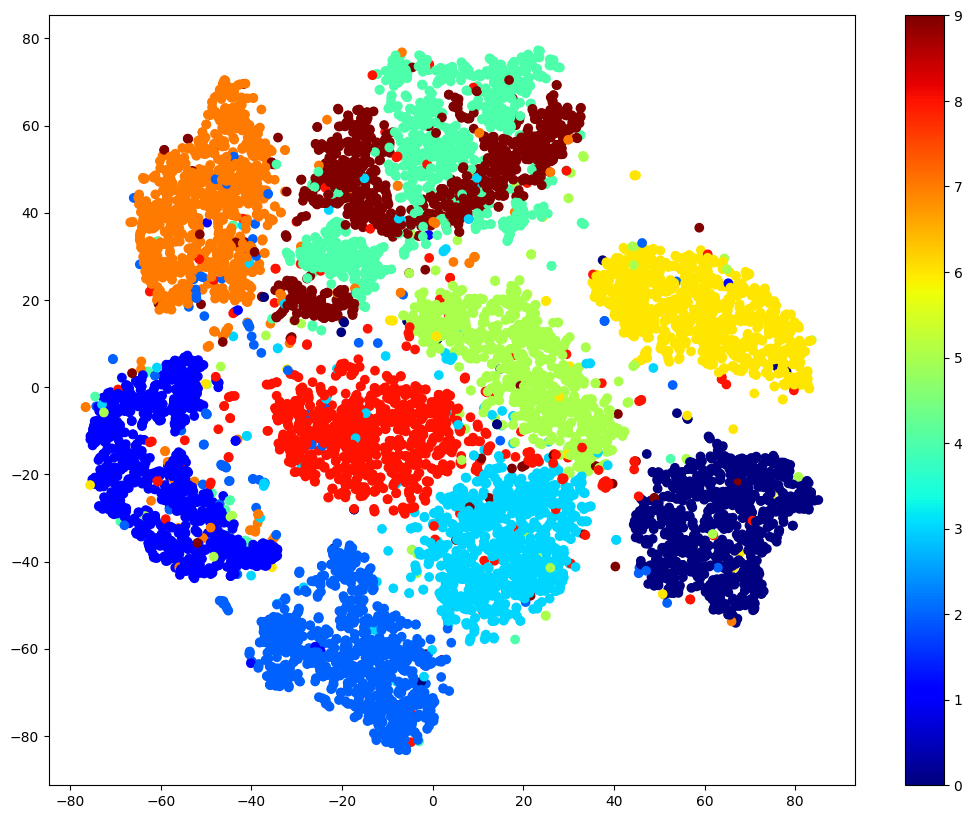

In [ ]:
from matplotlib import pyplot as plt

y_numeric = np.array(y).astype(float)

plt.figure(figsize=(13,10))
plt.scatter(X_reduced[:,0], X_reduced[:, 1], c=y_numeric, cmap='jet')
plt.colorbar()

<ipython-input-178-8b09ceb8b98f>:5: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_reduced[y_numeric==digit, 0], X_reduced[y_numeric==digit, 1], c=cmap(digit/9), label=f'Digit - {digit}')


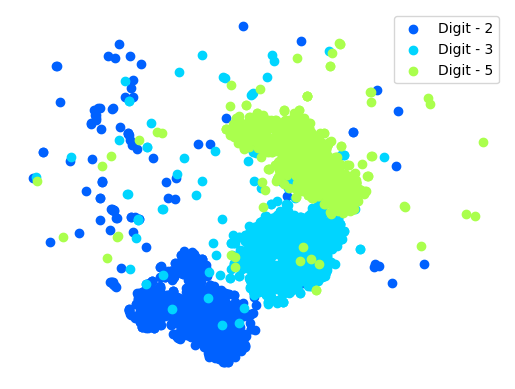

In [ ]:
import matplotlib as mpl
cmap = mpl.cm.jet

for digit in (2, 3, 5):
  plt.scatter(X_reduced[y_numeric==digit, 0], X_reduced[y_numeric==digit, 1], c=cmap(digit/9), label=f'Digit - {digit}')

plt.axis('off')
plt.legend()
plt.show()

In [ ]:
idx = (y_numeric==2) | (y_numeric==3) | (y_numeric==5)

X_subset = X[idx]

tsne_subset = TSNE(n_components=2, random_state=42)
X_subset_reduced = tsne_subset.fit_transform(X_subset)

<ipython-input-186-282d86d8019c>:6: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_subset_reduced[y_subset==digit, 0], X_subset_reduced[y_subset==digit, 1], c=cmap(digit/9), label=f'Digit - {digit}')


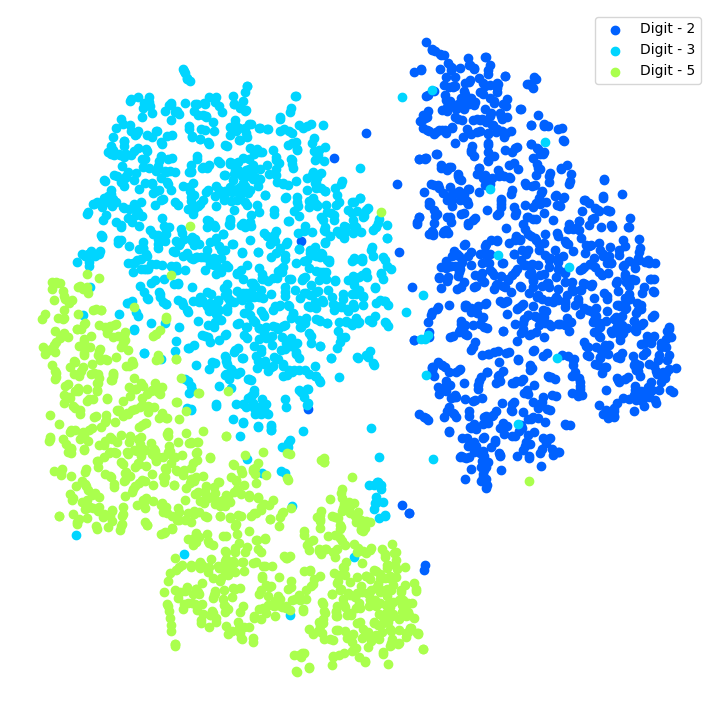

In [ ]:
y_subset = y_numeric[idx]

plt.figure(figsize=(9,9))

for digit in (2,3,5):
  plt.scatter(X_subset_reduced[y_subset==digit, 0], X_subset_reduced[y_subset==digit, 1], c=cmap(digit/9), label=f'Digit - {digit}')

plt.axis('off')
plt.legend()
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from matplotlib.offsetbox import AnnotationBbox, OffsetImage

def plot_digits(X, y, min_distance=0.05, images=None, figsize=(13, 10)):
    # Let's scale the input features so that they range from 0 to 1
    X_normalized = MinMaxScaler().fit_transform(X)
    # Now we create the list of coordinates of the digits plotted so far.
    # We pretend that one is already plotted far away at the start, to
    # avoid `if` statements in the loop below
    neighbors = np.array([[10., 10.]])
    # The rest should be self-explanatory
    plt.figure(figsize=figsize)
    cmap = mpl.cm.get_cmap("jet")
    digits = np.unique(y)
    for digit in digits:
        plt.scatter(X_normalized[y == digit, 0], X_normalized[y == digit, 1], c=[cmap(digit / 9)])
    plt.axis("off")
    ax = plt.gcf().gca()  # get current axes in current figure
    for index, image_coord in enumerate(X_normalized):
        closest_distance = np.linalg.norm(neighbors - image_coord, axis=1).min()
        if closest_distance > min_distance:
            neighbors = np.r_[neighbors, [image_coord]]
            if images is None:
                plt.text(image_coord[0], image_coord[1], str(int(y[index])),
                         color=cmap(y[index] / 9), fontdict={"weight": "bold", "size": 16})
            else:
                image = images[index].reshape(28, 28)
                imagebox = AnnotationBbox(OffsetImage(image, cmap="binary"), image_coord)
                ax.add_artist(imagebox)

<ipython-input-187-9b8e5b35c1ec>:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = mpl.cm.get_cmap("jet")


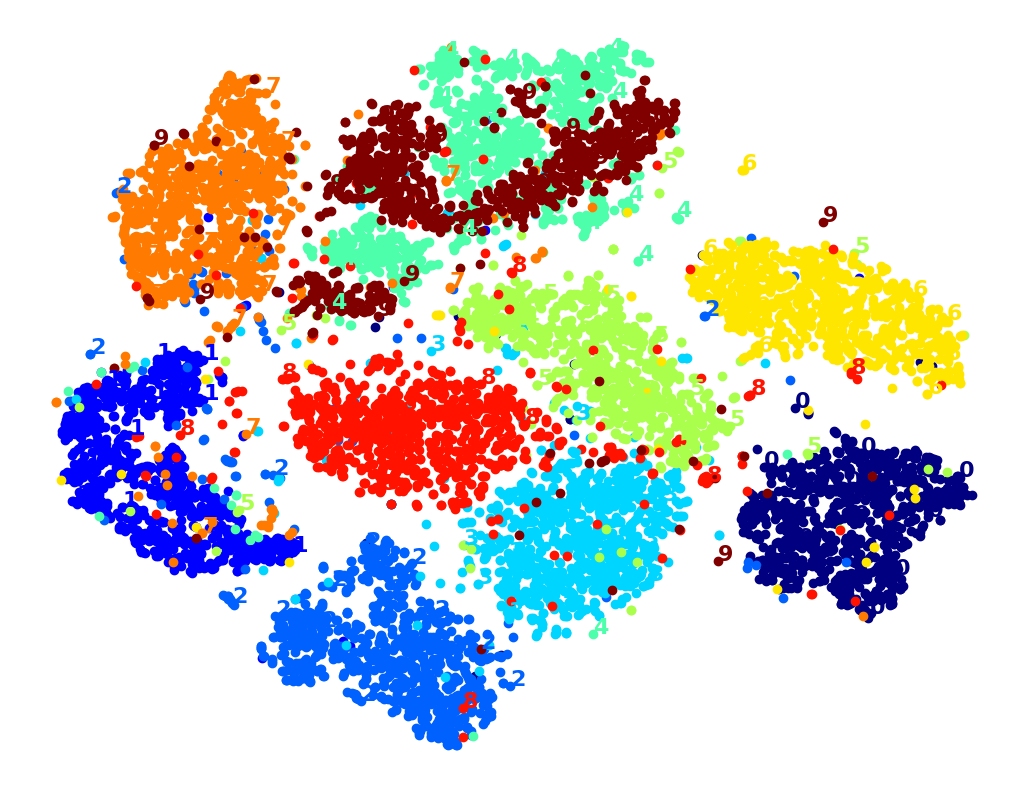

In [ ]:
plot_digits(X_reduced, y_numeric)

<ipython-input-187-9b8e5b35c1ec>:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = mpl.cm.get_cmap("jet")


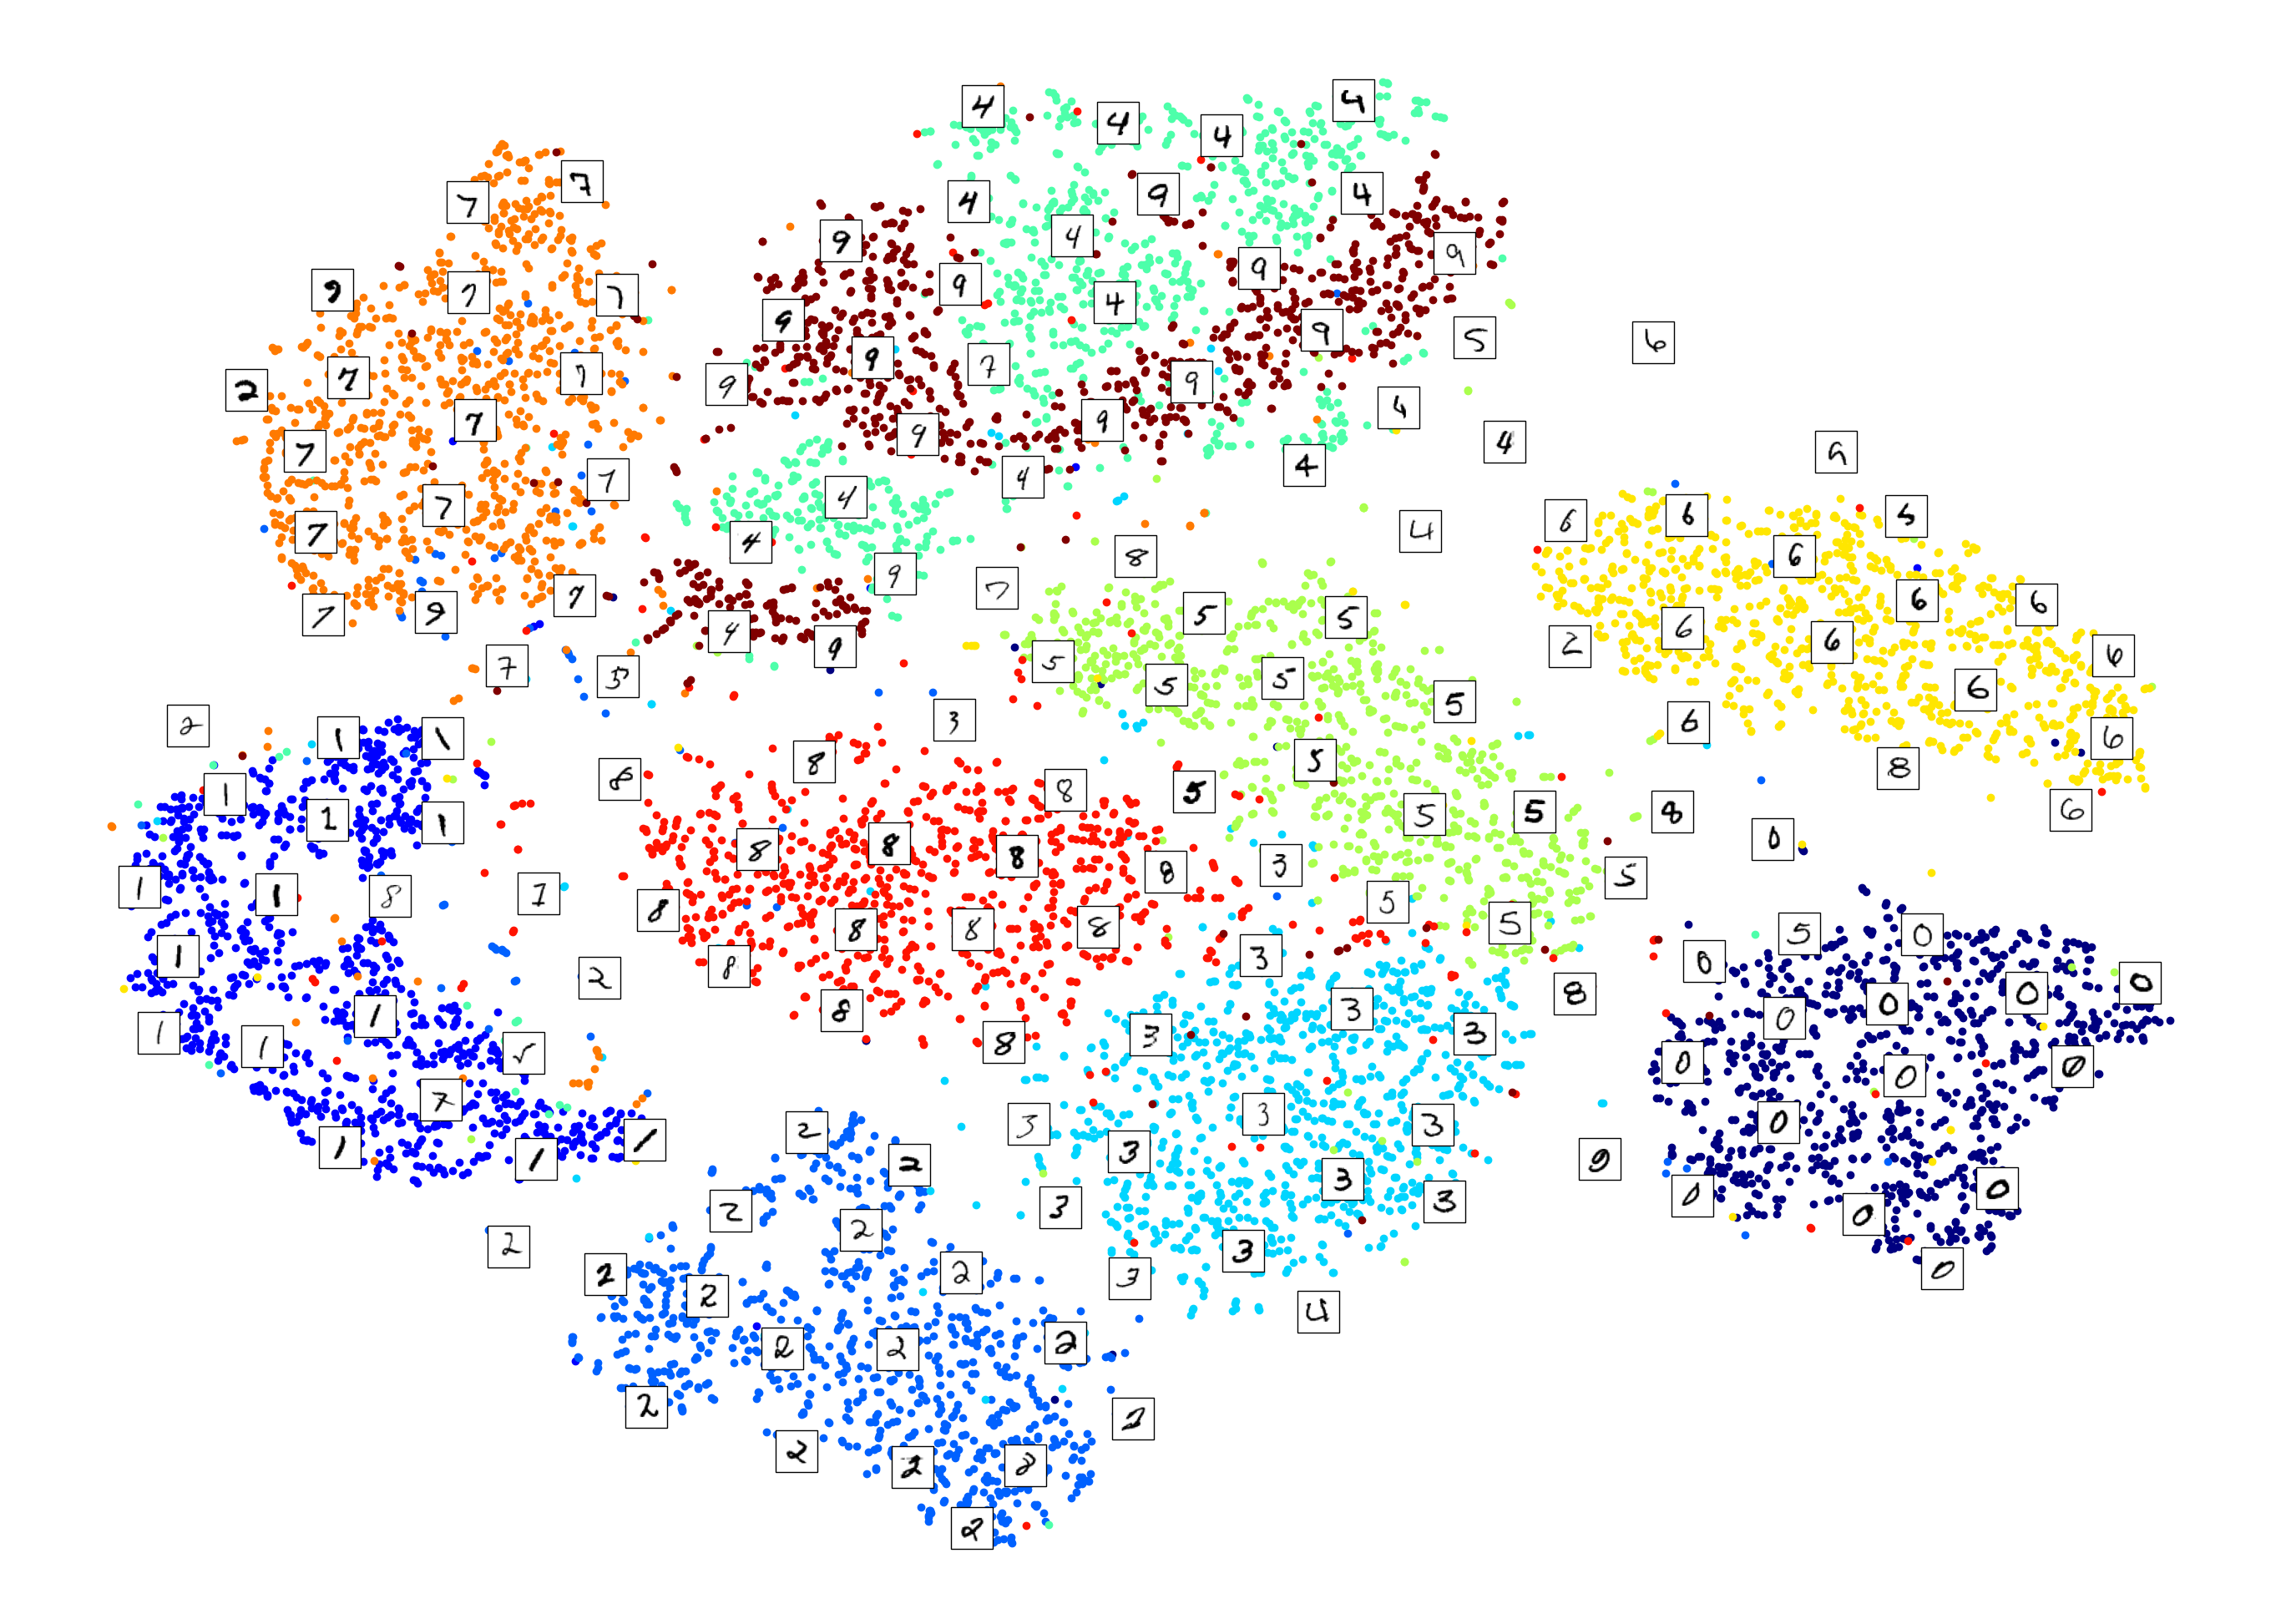

In [ ]:
plot_digits(X_reduced, y_numeric, images=X, figsize=(35, 25))

<ipython-input-187-9b8e5b35c1ec>:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = mpl.cm.get_cmap("jet")


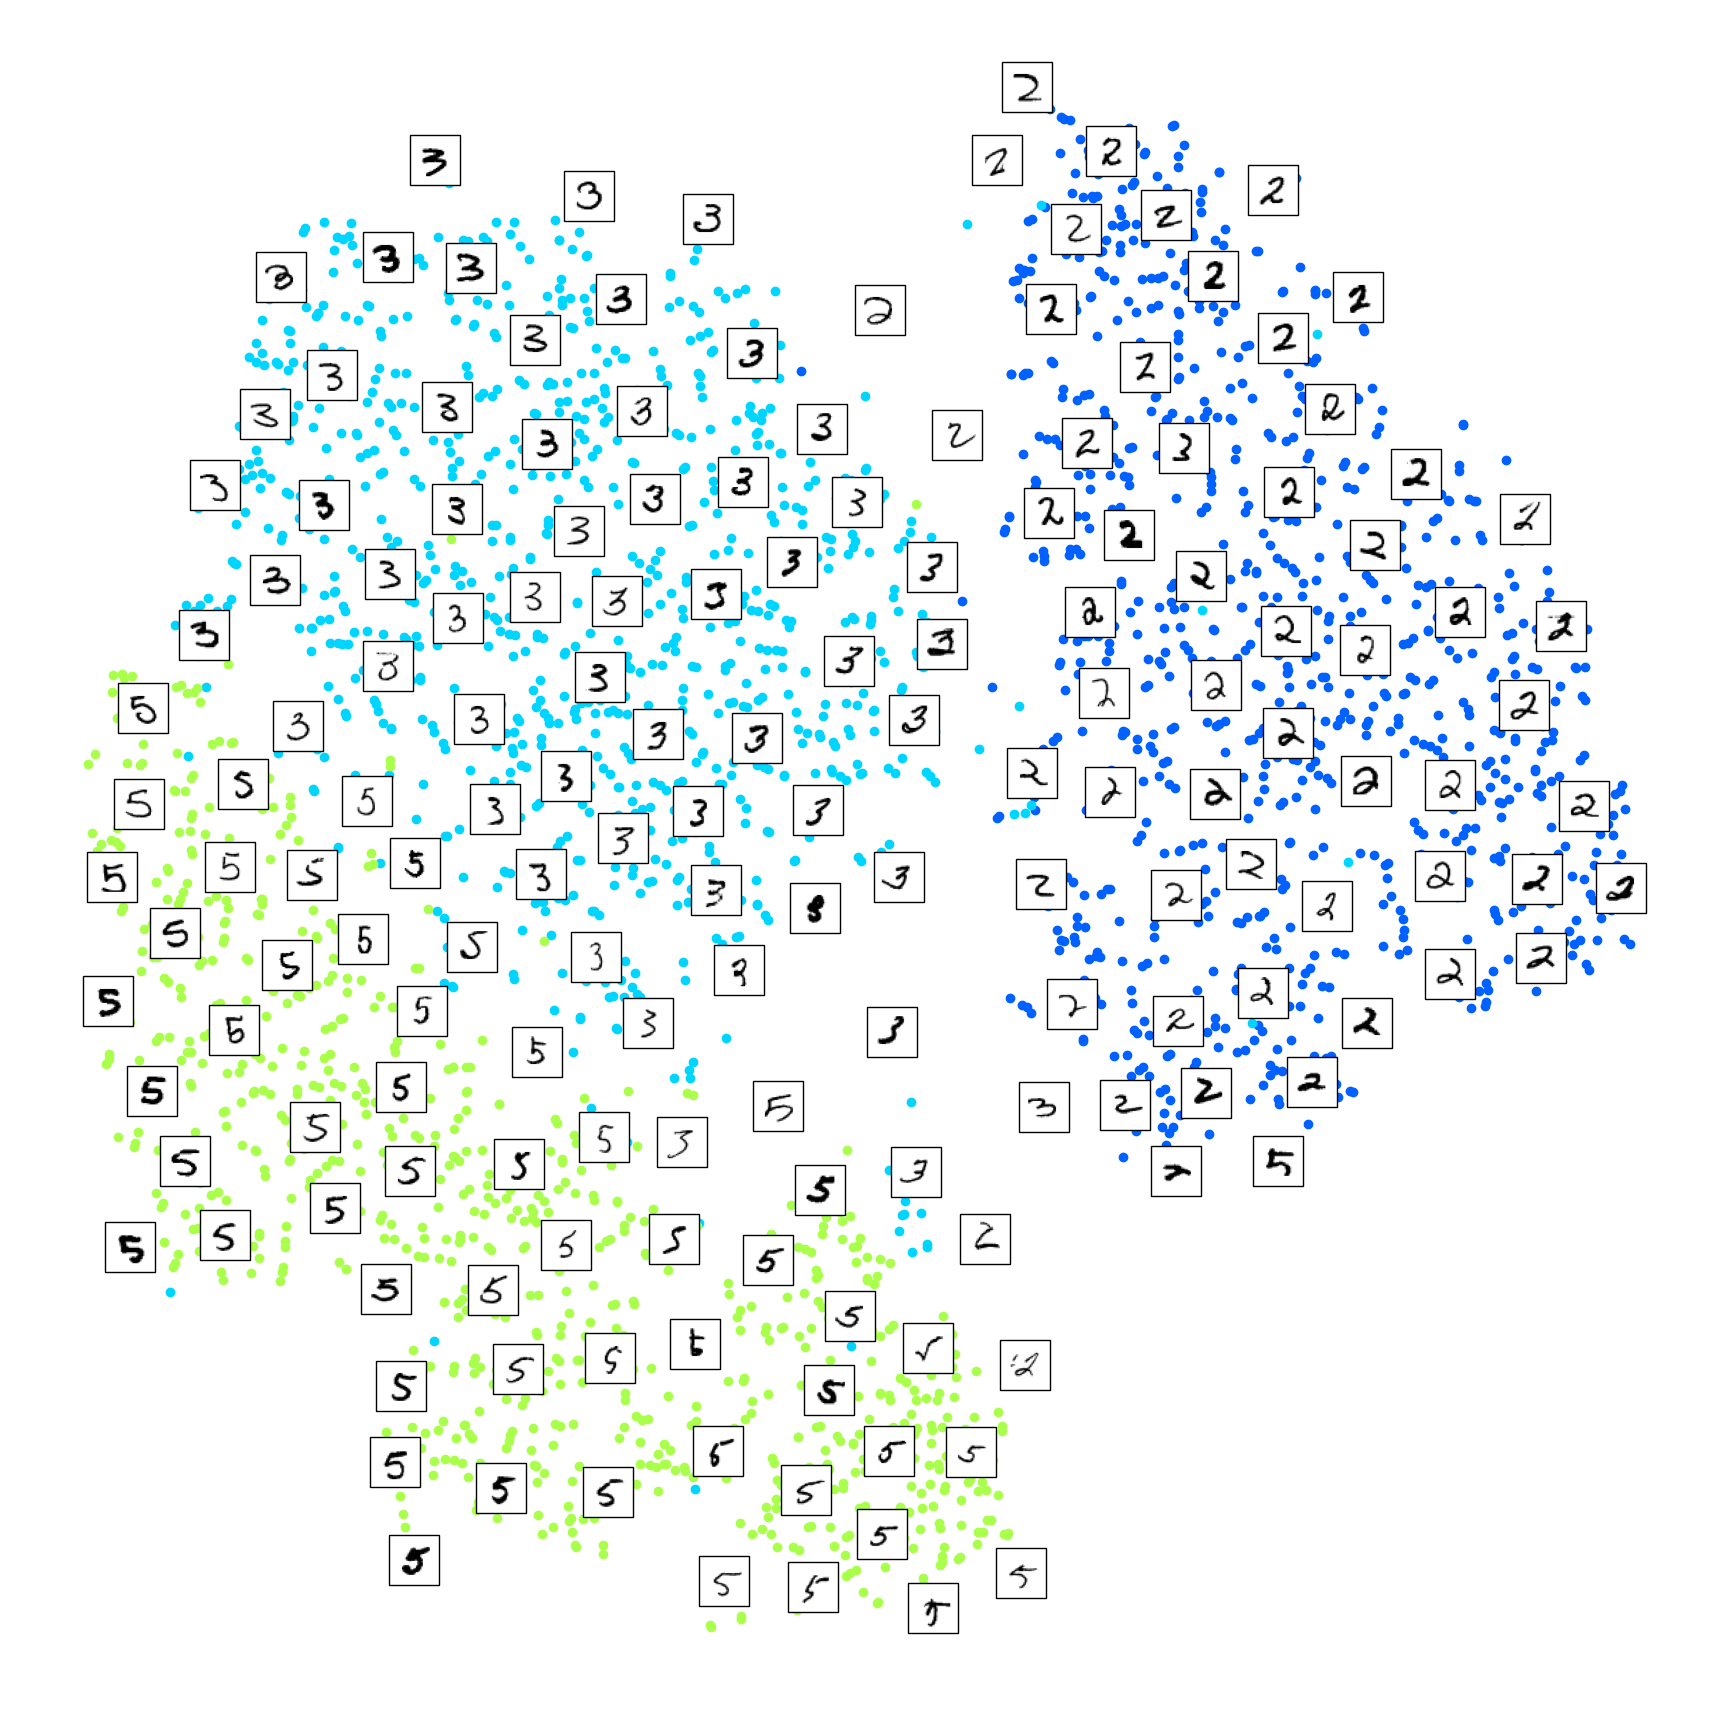

In [ ]:
plot_digits(X_subset_reduced, y_subset, images=X_subset, figsize=(22, 22))

PCA took 0.9s


<ipython-input-187-9b8e5b35c1ec>:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = mpl.cm.get_cmap("jet")


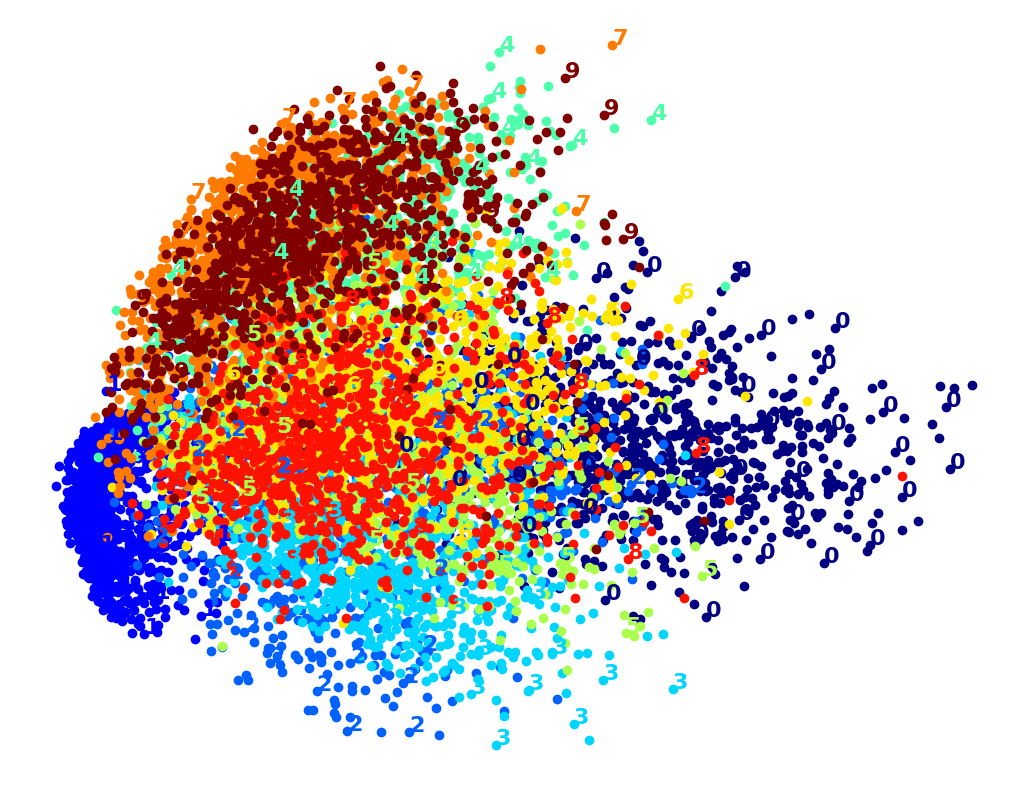

In [ ]:
from sklearn.decomposition import PCA
import time

t0 = time.time()
X_pca_reduced = PCA(n_components=2, random_state=42).fit_transform(X)
t1 = time.time()
print('PCA took {:.1f}s'.format(t1-t0))
plot_digits(X_pca_reduced, y_numeric)
plt.show()

LLE took 50.8s.


<ipython-input-187-9b8e5b35c1ec>:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = mpl.cm.get_cmap("jet")


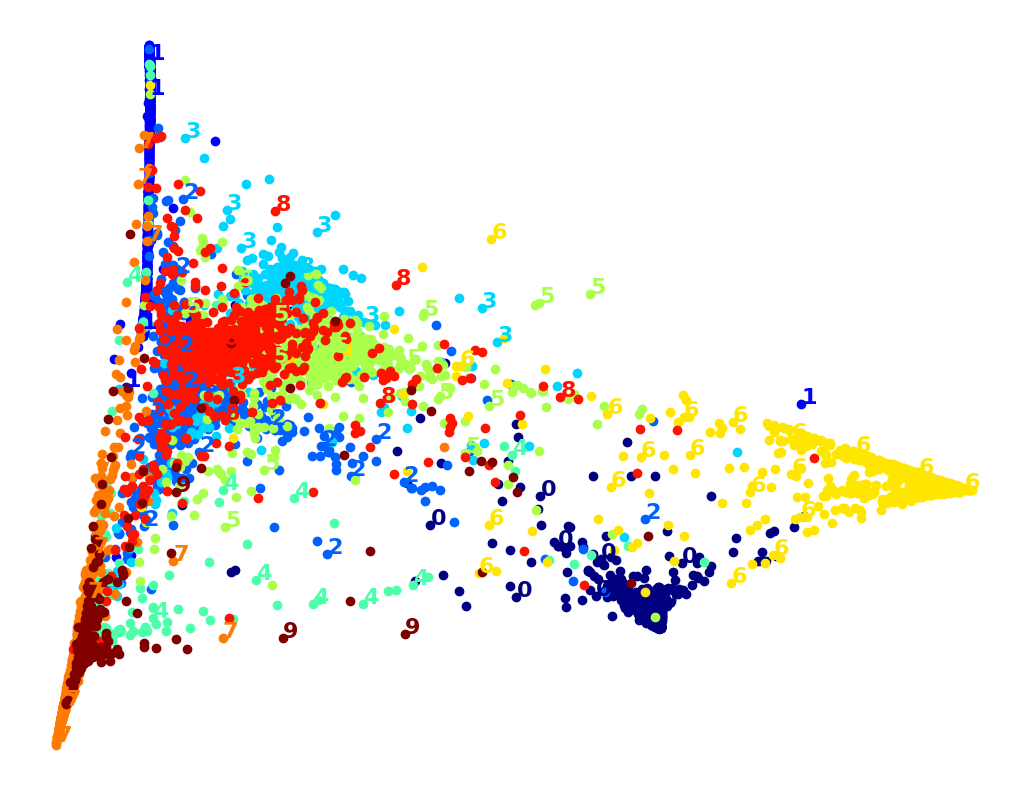

In [ ]:
from sklearn.manifold import LocallyLinearEmbedding

t0 = time.time()
X_lle_reduced = LocallyLinearEmbedding(n_components=2, random_state=42).fit_transform(X)
t1 = time.time()
print("LLE took {:.1f}s.".format(t1 - t0))
plot_digits(X_lle_reduced, y_numeric)
plt.show()

PCA+LLE took 54.2s.


<ipython-input-187-9b8e5b35c1ec>:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = mpl.cm.get_cmap("jet")


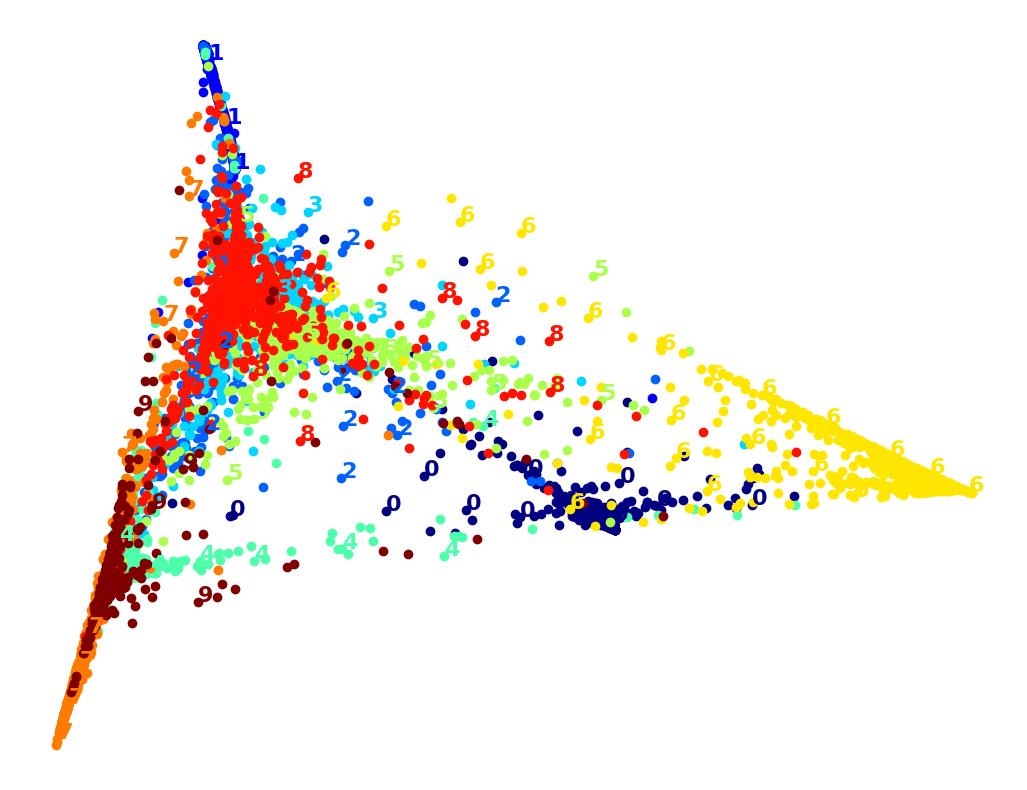

In [ ]:
from sklearn.pipeline import Pipeline

pca_lle = Pipeline([
    ("pca", PCA(n_components=0.95, random_state=42)),
    ("lle", LocallyLinearEmbedding(n_components=2, random_state=42)),
])
t0 = time.time()
X_pca_lle_reduced = pca_lle.fit_transform(X)
t1 = time.time()
print("PCA+LLE took {:.1f}s.".format(t1 - t0))
plot_digits(X_pca_lle_reduced, y_numeric)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


MDS took 172.7s (on just 2,000 MNIST images instead of 10,000).


<ipython-input-187-9b8e5b35c1ec>:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = mpl.cm.get_cmap("jet")


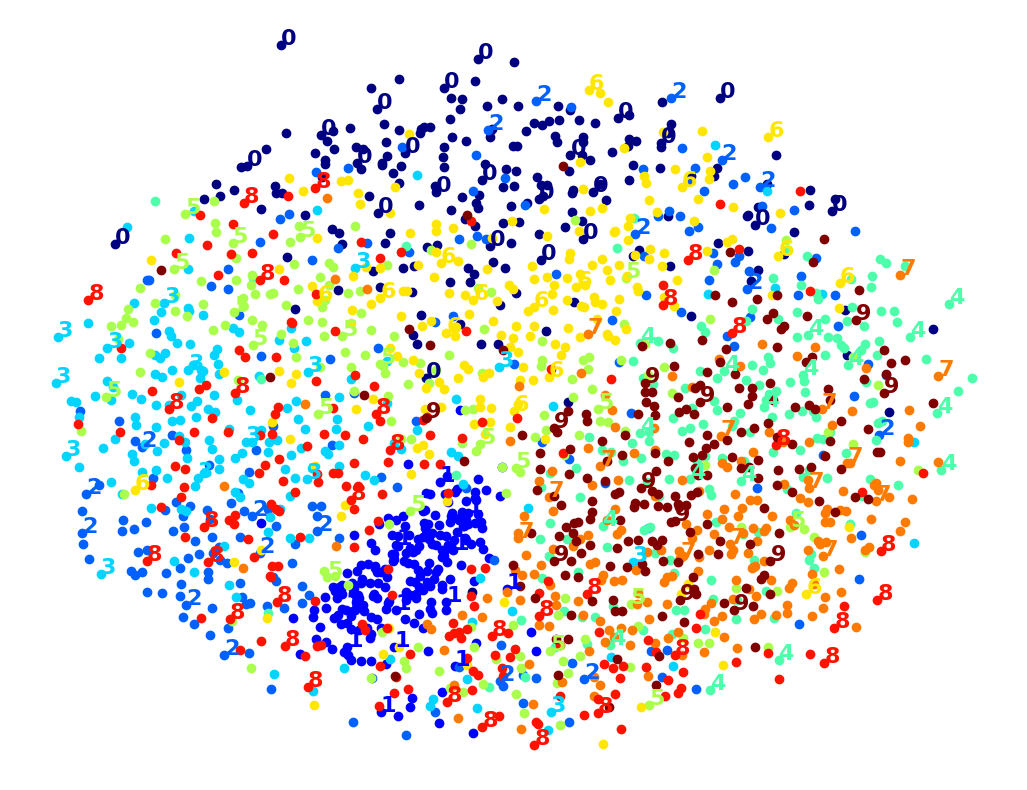

In [ ]:
from sklearn.manifold import MDS

m = 2000
t0=time.time()
X_mds_reduced = MDS(n_components=2, random_state=42).fit_transform(X[:m])
t1=time.time()
print("MDS took {:.1f}s (on just 2,000 MNIST images instead of 10,000).".format(t1 - t0))
plot_digits(X_mds_reduced, y_numeric[:m])
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


PCA+MDS took 139.5s (on 2,000 MNIST images).


<ipython-input-187-9b8e5b35c1ec>:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = mpl.cm.get_cmap("jet")


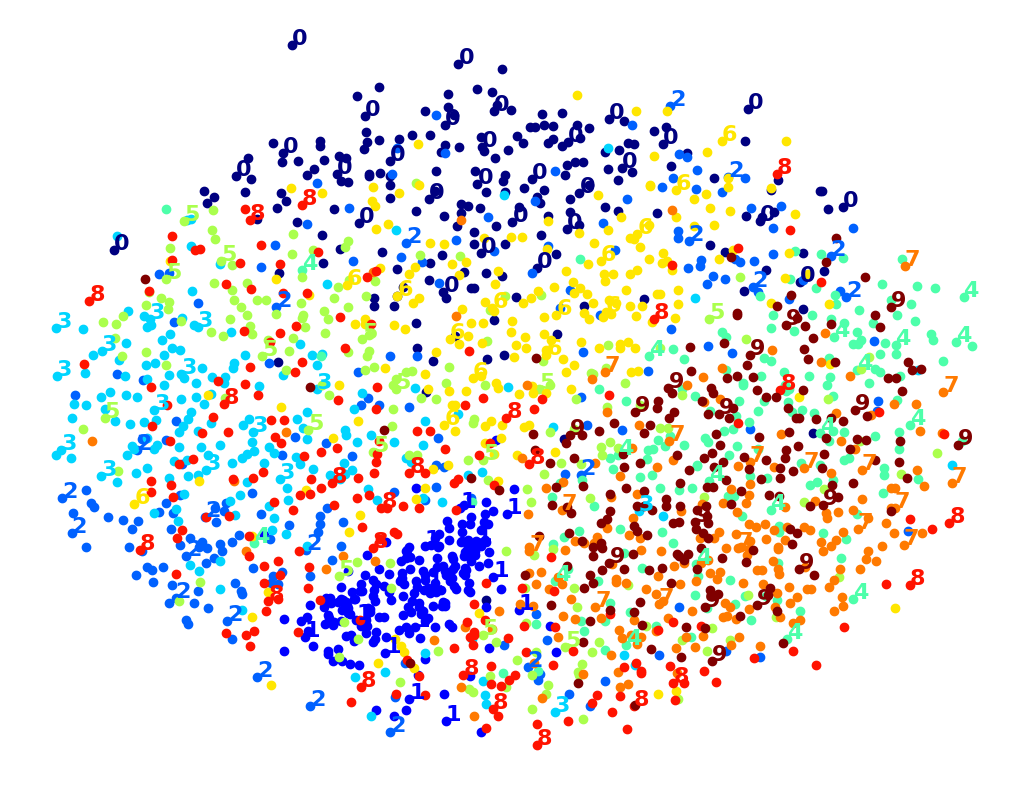

In [ ]:
from sklearn.pipeline import Pipeline

pca_mds = Pipeline([
    ("pca", PCA(n_components=0.90, random_state=42)),
    ("mds", MDS(n_components=2, random_state=42)),
])
t0 = time.time()
X_pca_mds_reduced = pca_mds.fit_transform(X[:2000])
t1 = time.time()
print("PCA+MDS took {:.1f}s (on 2,000 MNIST images).".format(t1 - t0))
plot_digits(X_pca_mds_reduced, y_numeric[:2000])
plt.show()

LDA took 2.9s.


<ipython-input-187-9b8e5b35c1ec>:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = mpl.cm.get_cmap("jet")


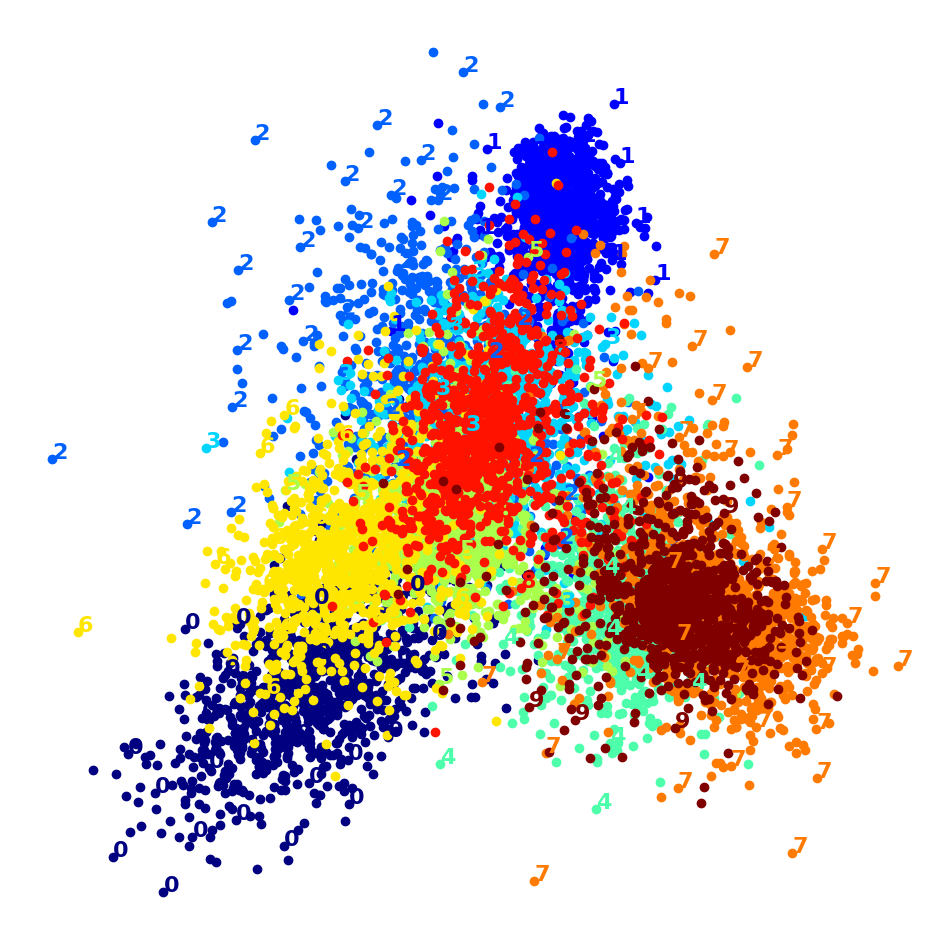

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

t0 = time.time()
X_lda_reduced = LinearDiscriminantAnalysis(n_components=2).fit_transform(X, y)
t1 = time.time()
print("LDA took {:.1f}s.".format(t1 - t0))
plot_digits(X_lda_reduced, y_numeric, figsize=(12,12))
plt.show()

t-SNE took 108.5s.


<ipython-input-187-9b8e5b35c1ec>:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = mpl.cm.get_cmap("jet")


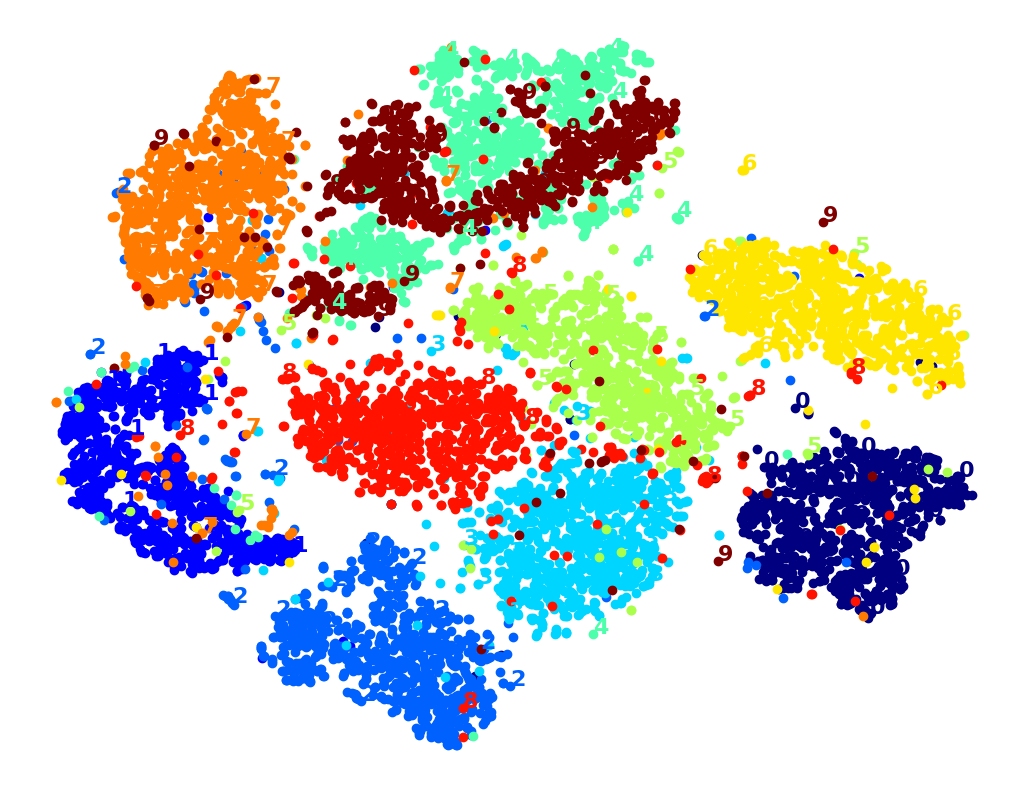

In [ ]:
from sklearn.manifold import TSNE

t0 = time.time()
X_tsne_reduced = TSNE(n_components=2, random_state=42).fit_transform(X)
t1 = time.time()
print("t-SNE took {:.1f}s.".format(t1 - t0))
plot_digits(X_tsne_reduced, y_numeric)
plt.show()

PCA+t-SNE took 102.9s.


<ipython-input-187-9b8e5b35c1ec>:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = mpl.cm.get_cmap("jet")


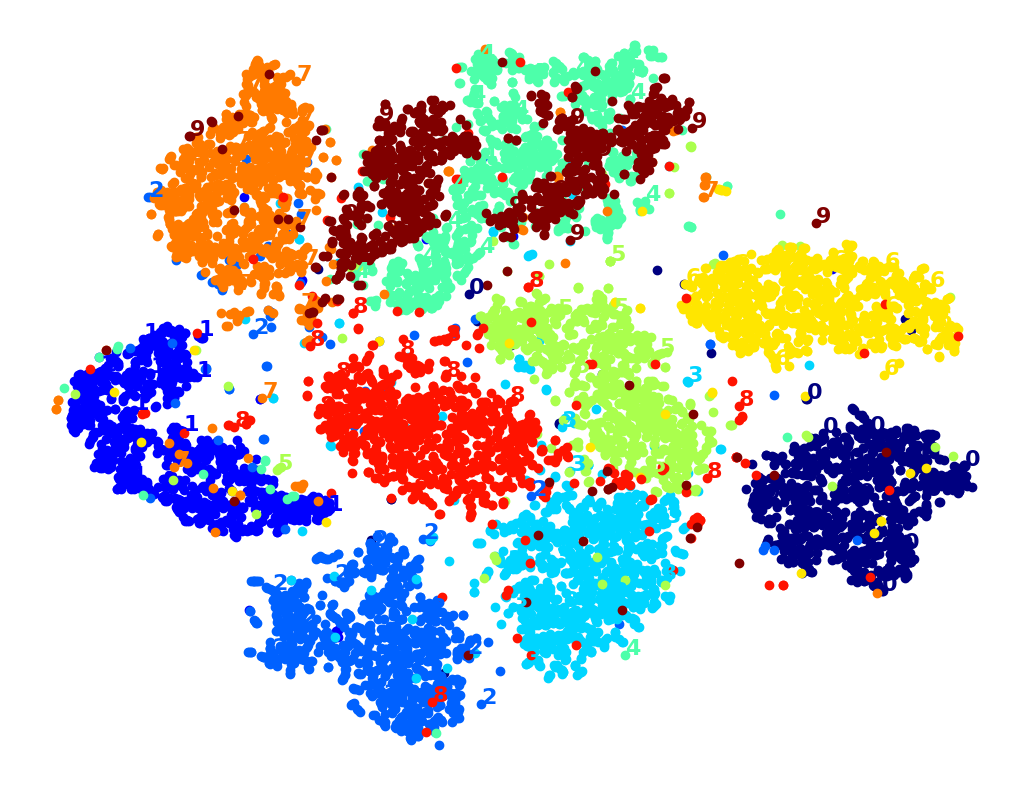

In [ ]:
pca_tsne = Pipeline([
    ("pca", PCA(n_components=0.95, random_state=42)),
    ("tsne", TSNE(n_components=2, random_state=42)),
])
t0 = time.time()
X_pca_tsne_reduced = pca_tsne.fit_transform(X)
t1 = time.time()
print("PCA+t-SNE took {:.1f}s.".format(t1 - t0))
plot_digits(X_pca_tsne_reduced, y_numeric)
plt.show()